In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   2   3   4   5   7   9  11  13  16  19  20  22  23  24  25  26  27
  28  29  30  32  33  35  36  38  39  40  41  42  43  44  46  47  51  53
  54  56  57  58  59  60  61  63  65  67  68  69  70  71  72  73  74  79
  80  81  82  83  84  86  87  88  89  90  91  93  94  95  96  97  98  99
 100 102 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 123 124 125 126 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 143 145 146 147 148 149 150 151 152 153 154 156 158 160 161 163
 164 166 167 168 169 171 172 173 174 176 177 178 179 180 181 182 183 184
 185 186 188 189 191 192 194 195 197 198 199 201 203 204 207 208 209 210
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 230
 231 232 234 237 238 241 244 248 253 254 255 256 257 258 259 260 262 263
 264 265 267 269 270 273 274 275 276 277 279 280 281 282 284 286 287 288
 289 290 291 292 294 295 296 297 299 300 302 304 305 307 308 309 310 311
 312 314 316 317 318 320 321 322 323 324 326

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .6,
                      max_depth=5, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[07:44:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08642	validation_0-mlogloss:1.09668	validation_1-merror:0.08025	validation_1-mlogloss:1.09666
[1]	validation_0-merror:0.08642	validation_0-mlogloss:1.09481	validation_1-merror:0.08025	validation_1-mlogloss:1.09485
[2]	validation_0-merror:0.08642	validation_0-mlogloss:1.09283	validation_1-merror:0.08025	validation_1-mlogloss:1.09287
[3]	validation_0-merror:0.08642	validation_0-mlogloss:1.09116	validation_1-merror:0.08025	validation_1-mlogloss:1.09116
[4]	validation_0-merror:0.08642	validation_0-mlogloss:1.08858	validation_1-merror:0.08025	validation_1-mlogloss:1.08860
[5]	validation_0-merror:0.08642	validation_

[65]	validation_0-merror:0.08642	validation_0-mlogloss:0.97150	validation_1-merror:0.08025	validation_1-mlogloss:0.97212
[66]	validation_0-merror:0.08642	validation_0-mlogloss:0.97013	validation_1-merror:0.08025	validation_1-mlogloss:0.97079
[67]	validation_0-merror:0.08642	validation_0-mlogloss:0.96834	validation_1-merror:0.08025	validation_1-mlogloss:0.96901
[68]	validation_0-merror:0.08642	validation_0-mlogloss:0.96707	validation_1-merror:0.08025	validation_1-mlogloss:0.96773
[69]	validation_0-merror:0.08642	validation_0-mlogloss:0.96526	validation_1-merror:0.08025	validation_1-mlogloss:0.96591
[70]	validation_0-merror:0.08642	validation_0-mlogloss:0.96345	validation_1-merror:0.08025	validation_1-mlogloss:0.96411
[71]	validation_0-merror:0.08642	validation_0-mlogloss:0.96160	validation_1-merror:0.08025	validation_1-mlogloss:0.96227
[72]	validation_0-merror:0.08642	validation_0-mlogloss:0.95974	validation_1-merror:0.08025	validation_1-mlogloss:0.96042
[73]	validation_0-merror:0.08642

[133]	validation_0-merror:0.08642	validation_0-mlogloss:0.87668	validation_1-merror:0.08025	validation_1-mlogloss:0.87793
[134]	validation_0-merror:0.08642	validation_0-mlogloss:0.87523	validation_1-merror:0.08025	validation_1-mlogloss:0.87649
[135]	validation_0-merror:0.08642	validation_0-mlogloss:0.87438	validation_1-merror:0.08025	validation_1-mlogloss:0.87567
[136]	validation_0-merror:0.08642	validation_0-mlogloss:0.87382	validation_1-merror:0.08025	validation_1-mlogloss:0.87513
[137]	validation_0-merror:0.08642	validation_0-mlogloss:0.87290	validation_1-merror:0.08025	validation_1-mlogloss:0.87421
[138]	validation_0-merror:0.08642	validation_0-mlogloss:0.87142	validation_1-merror:0.08025	validation_1-mlogloss:0.87272
[139]	validation_0-merror:0.08642	validation_0-mlogloss:0.87005	validation_1-merror:0.08025	validation_1-mlogloss:0.87135
[140]	validation_0-merror:0.08642	validation_0-mlogloss:0.86908	validation_1-merror:0.08025	validation_1-mlogloss:0.87035
[141]	validation_0-merro

[201]	validation_0-merror:0.08642	validation_0-mlogloss:0.80595	validation_1-merror:0.08025	validation_1-mlogloss:0.80713
[202]	validation_0-merror:0.08642	validation_0-mlogloss:0.80493	validation_1-merror:0.08025	validation_1-mlogloss:0.80611
[203]	validation_0-merror:0.08642	validation_0-mlogloss:0.80381	validation_1-merror:0.08025	validation_1-mlogloss:0.80499
[204]	validation_0-merror:0.08642	validation_0-mlogloss:0.80312	validation_1-merror:0.08025	validation_1-mlogloss:0.80428
[205]	validation_0-merror:0.08642	validation_0-mlogloss:0.80244	validation_1-merror:0.08025	validation_1-mlogloss:0.80358
[206]	validation_0-merror:0.08642	validation_0-mlogloss:0.80180	validation_1-merror:0.08025	validation_1-mlogloss:0.80296
[207]	validation_0-merror:0.08642	validation_0-mlogloss:0.80071	validation_1-merror:0.08025	validation_1-mlogloss:0.80187
[208]	validation_0-merror:0.08642	validation_0-mlogloss:0.80007	validation_1-merror:0.08025	validation_1-mlogloss:0.80127
[209]	validation_0-merro

[269]	validation_0-merror:0.08642	validation_0-mlogloss:0.75372	validation_1-merror:0.08025	validation_1-mlogloss:0.75482
[270]	validation_0-merror:0.08642	validation_0-mlogloss:0.75285	validation_1-merror:0.08025	validation_1-mlogloss:0.75394
[271]	validation_0-merror:0.08642	validation_0-mlogloss:0.75207	validation_1-merror:0.08025	validation_1-mlogloss:0.75316
[272]	validation_0-merror:0.08642	validation_0-mlogloss:0.75128	validation_1-merror:0.08025	validation_1-mlogloss:0.75237
[273]	validation_0-merror:0.08642	validation_0-mlogloss:0.75049	validation_1-merror:0.08025	validation_1-mlogloss:0.75158
[274]	validation_0-merror:0.08642	validation_0-mlogloss:0.75030	validation_1-merror:0.08025	validation_1-mlogloss:0.75141
[275]	validation_0-merror:0.08642	validation_0-mlogloss:0.74994	validation_1-merror:0.08025	validation_1-mlogloss:0.75102
[276]	validation_0-merror:0.08642	validation_0-mlogloss:0.74916	validation_1-merror:0.08025	validation_1-mlogloss:0.75024
[277]	validation_0-merro

[337]	validation_0-merror:0.08642	validation_0-mlogloss:0.71167	validation_1-merror:0.08025	validation_1-mlogloss:0.71258
[338]	validation_0-merror:0.08642	validation_0-mlogloss:0.71101	validation_1-merror:0.08025	validation_1-mlogloss:0.71191
[339]	validation_0-merror:0.08642	validation_0-mlogloss:0.71035	validation_1-merror:0.08025	validation_1-mlogloss:0.71125
[340]	validation_0-merror:0.08642	validation_0-mlogloss:0.70997	validation_1-merror:0.08025	validation_1-mlogloss:0.71089
[341]	validation_0-merror:0.08642	validation_0-mlogloss:0.70929	validation_1-merror:0.08025	validation_1-mlogloss:0.71021
[342]	validation_0-merror:0.08642	validation_0-mlogloss:0.70861	validation_1-merror:0.08025	validation_1-mlogloss:0.70952
[343]	validation_0-merror:0.08642	validation_0-mlogloss:0.70794	validation_1-merror:0.08025	validation_1-mlogloss:0.70885
[344]	validation_0-merror:0.08642	validation_0-mlogloss:0.70762	validation_1-merror:0.08025	validation_1-mlogloss:0.70855
[345]	validation_0-merro

[405]	validation_0-merror:0.08642	validation_0-mlogloss:0.67844	validation_1-merror:0.08025	validation_1-mlogloss:0.67929
[406]	validation_0-merror:0.08642	validation_0-mlogloss:0.67812	validation_1-merror:0.08025	validation_1-mlogloss:0.67899
[407]	validation_0-merror:0.08642	validation_0-mlogloss:0.67758	validation_1-merror:0.08025	validation_1-mlogloss:0.67845
[408]	validation_0-merror:0.08642	validation_0-mlogloss:0.67703	validation_1-merror:0.08025	validation_1-mlogloss:0.67789
[409]	validation_0-merror:0.08642	validation_0-mlogloss:0.67697	validation_1-merror:0.08025	validation_1-mlogloss:0.67784
[410]	validation_0-merror:0.08642	validation_0-mlogloss:0.67644	validation_1-merror:0.08025	validation_1-mlogloss:0.67731
[411]	validation_0-merror:0.08642	validation_0-mlogloss:0.67620	validation_1-merror:0.08025	validation_1-mlogloss:0.67705
[412]	validation_0-merror:0.08642	validation_0-mlogloss:0.67563	validation_1-merror:0.08025	validation_1-mlogloss:0.67648
[413]	validation_0-merro

[473]	validation_0-merror:0.08642	validation_0-mlogloss:0.65118	validation_1-merror:0.08025	validation_1-mlogloss:0.65195
[474]	validation_0-merror:0.08642	validation_0-mlogloss:0.65073	validation_1-merror:0.08025	validation_1-mlogloss:0.65151
[475]	validation_0-merror:0.08642	validation_0-mlogloss:0.65033	validation_1-merror:0.08025	validation_1-mlogloss:0.65112
[476]	validation_0-merror:0.08642	validation_0-mlogloss:0.64991	validation_1-merror:0.08025	validation_1-mlogloss:0.65069
[477]	validation_0-merror:0.08642	validation_0-mlogloss:0.64962	validation_1-merror:0.08025	validation_1-mlogloss:0.65042
[478]	validation_0-merror:0.08642	validation_0-mlogloss:0.64914	validation_1-merror:0.08025	validation_1-mlogloss:0.64993
[479]	validation_0-merror:0.08642	validation_0-mlogloss:0.64868	validation_1-merror:0.08025	validation_1-mlogloss:0.64946
[480]	validation_0-merror:0.08642	validation_0-mlogloss:0.64846	validation_1-merror:0.08025	validation_1-mlogloss:0.64924
[481]	validation_0-merro

[541]	validation_0-merror:0.08642	validation_0-mlogloss:0.62782	validation_1-merror:0.08025	validation_1-mlogloss:0.62842
[542]	validation_0-merror:0.08642	validation_0-mlogloss:0.62741	validation_1-merror:0.08025	validation_1-mlogloss:0.62802
[543]	validation_0-merror:0.08642	validation_0-mlogloss:0.62703	validation_1-merror:0.08025	validation_1-mlogloss:0.62764
[544]	validation_0-merror:0.08642	validation_0-mlogloss:0.62665	validation_1-merror:0.08025	validation_1-mlogloss:0.62725
[545]	validation_0-merror:0.08642	validation_0-mlogloss:0.62627	validation_1-merror:0.08025	validation_1-mlogloss:0.62688
[546]	validation_0-merror:0.08642	validation_0-mlogloss:0.62602	validation_1-merror:0.08025	validation_1-mlogloss:0.62664
[547]	validation_0-merror:0.08642	validation_0-mlogloss:0.62578	validation_1-merror:0.08025	validation_1-mlogloss:0.62641
[548]	validation_0-merror:0.08642	validation_0-mlogloss:0.62536	validation_1-merror:0.08025	validation_1-mlogloss:0.62599
[549]	validation_0-merro

[609]	validation_0-merror:0.08642	validation_0-mlogloss:0.60639	validation_1-merror:0.08025	validation_1-mlogloss:0.60703
[610]	validation_0-merror:0.08642	validation_0-mlogloss:0.60606	validation_1-merror:0.08025	validation_1-mlogloss:0.60671
[611]	validation_0-merror:0.08642	validation_0-mlogloss:0.60580	validation_1-merror:0.08025	validation_1-mlogloss:0.60645
[612]	validation_0-merror:0.08642	validation_0-mlogloss:0.60559	validation_1-merror:0.08025	validation_1-mlogloss:0.60625
[613]	validation_0-merror:0.08642	validation_0-mlogloss:0.60523	validation_1-merror:0.08025	validation_1-mlogloss:0.60589
[614]	validation_0-merror:0.08642	validation_0-mlogloss:0.60491	validation_1-merror:0.08025	validation_1-mlogloss:0.60557
[615]	validation_0-merror:0.08642	validation_0-mlogloss:0.60459	validation_1-merror:0.08025	validation_1-mlogloss:0.60524
[616]	validation_0-merror:0.08642	validation_0-mlogloss:0.60421	validation_1-merror:0.08025	validation_1-mlogloss:0.60486
[617]	validation_0-merro

[677]	validation_0-merror:0.08642	validation_0-mlogloss:0.58966	validation_1-merror:0.08025	validation_1-mlogloss:0.59022
[678]	validation_0-merror:0.08642	validation_0-mlogloss:0.58941	validation_1-merror:0.08025	validation_1-mlogloss:0.58997
[679]	validation_0-merror:0.08642	validation_0-mlogloss:0.58908	validation_1-merror:0.08025	validation_1-mlogloss:0.58964
[680]	validation_0-merror:0.08642	validation_0-mlogloss:0.58882	validation_1-merror:0.08025	validation_1-mlogloss:0.58937
[681]	validation_0-merror:0.08642	validation_0-mlogloss:0.58847	validation_1-merror:0.08025	validation_1-mlogloss:0.58903
[682]	validation_0-merror:0.08642	validation_0-mlogloss:0.58818	validation_1-merror:0.08025	validation_1-mlogloss:0.58873
[683]	validation_0-merror:0.08642	validation_0-mlogloss:0.58806	validation_1-merror:0.08025	validation_1-mlogloss:0.58861
[684]	validation_0-merror:0.08642	validation_0-mlogloss:0.58780	validation_1-merror:0.08025	validation_1-mlogloss:0.58834
[685]	validation_0-merro

[745]	validation_0-merror:0.08642	validation_0-mlogloss:0.57606	validation_1-merror:0.08025	validation_1-mlogloss:0.57651
[746]	validation_0-merror:0.08642	validation_0-mlogloss:0.57585	validation_1-merror:0.08025	validation_1-mlogloss:0.57630
[747]	validation_0-merror:0.08642	validation_0-mlogloss:0.57585	validation_1-merror:0.08025	validation_1-mlogloss:0.57630
[748]	validation_0-merror:0.08642	validation_0-mlogloss:0.57563	validation_1-merror:0.08025	validation_1-mlogloss:0.57608
[749]	validation_0-merror:0.08642	validation_0-mlogloss:0.57557	validation_1-merror:0.08025	validation_1-mlogloss:0.57601
[750]	validation_0-merror:0.08642	validation_0-mlogloss:0.57532	validation_1-merror:0.08025	validation_1-mlogloss:0.57576
[751]	validation_0-merror:0.08642	validation_0-mlogloss:0.57504	validation_1-merror:0.08025	validation_1-mlogloss:0.57549
[752]	validation_0-merror:0.08642	validation_0-mlogloss:0.57480	validation_1-merror:0.08025	validation_1-mlogloss:0.57524
[753]	validation_0-merro

[813]	validation_0-merror:0.08642	validation_0-mlogloss:0.56378	validation_1-merror:0.08025	validation_1-mlogloss:0.56425
[814]	validation_0-merror:0.08642	validation_0-mlogloss:0.56378	validation_1-merror:0.08025	validation_1-mlogloss:0.56425
[815]	validation_0-merror:0.08642	validation_0-mlogloss:0.56358	validation_1-merror:0.08025	validation_1-mlogloss:0.56403
[816]	validation_0-merror:0.08642	validation_0-mlogloss:0.56339	validation_1-merror:0.08025	validation_1-mlogloss:0.56385
[817]	validation_0-merror:0.08642	validation_0-mlogloss:0.56314	validation_1-merror:0.08025	validation_1-mlogloss:0.56360
[818]	validation_0-merror:0.08642	validation_0-mlogloss:0.56289	validation_1-merror:0.08025	validation_1-mlogloss:0.56335
[819]	validation_0-merror:0.08642	validation_0-mlogloss:0.56282	validation_1-merror:0.08025	validation_1-mlogloss:0.56328
[820]	validation_0-merror:0.08642	validation_0-mlogloss:0.56256	validation_1-merror:0.08025	validation_1-mlogloss:0.56301
[821]	validation_0-merro

[881]	validation_0-merror:0.08642	validation_0-mlogloss:0.55378	validation_1-merror:0.08025	validation_1-mlogloss:0.55422
[882]	validation_0-merror:0.08642	validation_0-mlogloss:0.55367	validation_1-merror:0.08025	validation_1-mlogloss:0.55412
[883]	validation_0-merror:0.08642	validation_0-mlogloss:0.55349	validation_1-merror:0.08025	validation_1-mlogloss:0.55394
[884]	validation_0-merror:0.08642	validation_0-mlogloss:0.55328	validation_1-merror:0.08025	validation_1-mlogloss:0.55373
[885]	validation_0-merror:0.08642	validation_0-mlogloss:0.55303	validation_1-merror:0.08025	validation_1-mlogloss:0.55347
[886]	validation_0-merror:0.08642	validation_0-mlogloss:0.55290	validation_1-merror:0.08025	validation_1-mlogloss:0.55334
[887]	validation_0-merror:0.08642	validation_0-mlogloss:0.55290	validation_1-merror:0.08025	validation_1-mlogloss:0.55334
[888]	validation_0-merror:0.08642	validation_0-mlogloss:0.55276	validation_1-merror:0.08025	validation_1-mlogloss:0.55319
[889]	validation_0-merro

[949]	validation_0-merror:0.08642	validation_0-mlogloss:0.54393	validation_1-merror:0.08025	validation_1-mlogloss:0.54435
[950]	validation_0-merror:0.08642	validation_0-mlogloss:0.54383	validation_1-merror:0.08025	validation_1-mlogloss:0.54426
[951]	validation_0-merror:0.08642	validation_0-mlogloss:0.54371	validation_1-merror:0.08025	validation_1-mlogloss:0.54415
[952]	validation_0-merror:0.08642	validation_0-mlogloss:0.54361	validation_1-merror:0.08025	validation_1-mlogloss:0.54405
[953]	validation_0-merror:0.08642	validation_0-mlogloss:0.54349	validation_1-merror:0.08025	validation_1-mlogloss:0.54391
[954]	validation_0-merror:0.08642	validation_0-mlogloss:0.54330	validation_1-merror:0.08025	validation_1-mlogloss:0.54373
[955]	validation_0-merror:0.08642	validation_0-mlogloss:0.54316	validation_1-merror:0.08025	validation_1-mlogloss:0.54358
[956]	validation_0-merror:0.08642	validation_0-mlogloss:0.54316	validation_1-merror:0.08025	validation_1-mlogloss:0.54358
[957]	validation_0-merro

In [7]:
y_pred.shape

(162,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    92
1.0    70
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    87
1.0    74
2.0     1
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 91.36%
XGB Accuracy: 91.98%
LR train Accuracy: 88.48%
LR Accuracy: 90.74%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             25.97%
Feature Importance: HTGDIFF                             24.35%
Feature Importance: homeTeamScore.minutesInFront        11.98%
Feature Importance: awayTeamScore.minutesInFront        11.76%
Feature Importance: homeTeamScore.matchScore.totalScore 6.03%
Feature Importance: awayTeamScore.matchScore.totalScore 5.98%
Feature Importance: homeTeamScoreChart.goals            5.84%
Feature Importance: awayTeamScoreChart.goals            5.01%
Feature Importance: AVGHTGDIFF                          3.08%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScoreChart.goals', 'AVGHTGDIFF', 'round.year']

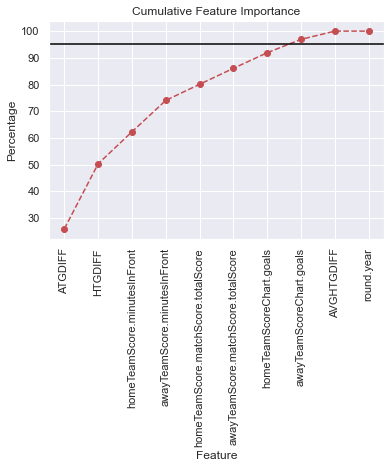

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

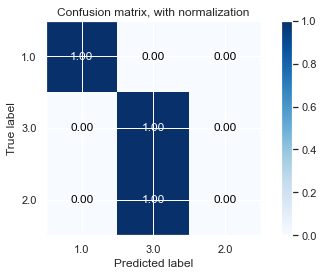

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 91.98%


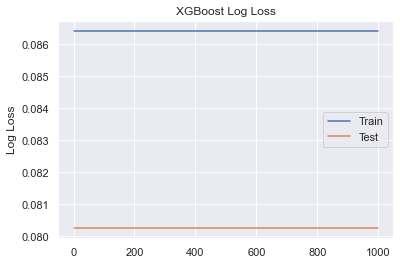

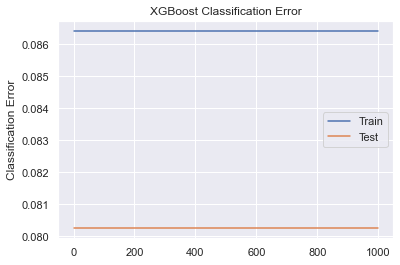

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
72,Collingwood,Western Bulldogs,1.0
73,Hawthorn,Richmond,1.0
74,North Melbourne,Port Adelaide,1.0
75,St Kilda,Geelong Cats,1.0
76,Sydney Swans,Essendon,1.0
77,Adelaide Crows,Brisbane Lions,1.0
78,Gold Coast Suns,Fremantle,1.0
79,GWS Giants,Carlton,3.0
80,West Coast Eagles,Melbourne,3.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
72,Collingwood,Western Bulldogs,1.0,0.570160,0.200560,0.229279
73,Hawthorn,Richmond,1.0,0.570662,0.200547,0.228791
74,North Melbourne,Port Adelaide,1.0,0.419255,0.212487,0.368259
75,St Kilda,Geelong Cats,1.0,0.570160,0.200560,0.229279
76,Sydney Swans,Essendon,1.0,0.419255,0.212487,0.368259
77,Adelaide Crows,Brisbane Lions,1.0,0.570662,0.200547,0.228791
78,Gold Coast Suns,Fremantle,1.0,0.419255,0.212487,0.368259
79,GWS Giants,Carlton,3.0,0.187377,0.176866,0.635756
80,West Coast Eagles,Melbourne,3.0,0.187377,0.176866,0.635756


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
72,Collingwood,Western Bulldogs,1.0,0.570160,0.200560,0.229279,0.429840
73,Hawthorn,Richmond,1.0,0.570662,0.200547,0.228791,0.429338
74,North Melbourne,Port Adelaide,1.0,0.419255,0.212487,0.368259,0.580745
75,St Kilda,Geelong Cats,1.0,0.570160,0.200560,0.229279,0.429840
76,Sydney Swans,Essendon,1.0,0.419255,0.212487,0.368259,0.580745
77,Adelaide Crows,Brisbane Lions,1.0,0.570662,0.200547,0.228791,0.429338
78,Gold Coast Suns,Fremantle,1.0,0.419255,0.212487,0.368259,0.580745
79,GWS Giants,Carlton,3.0,0.187377,0.176866,0.635756,0.635756
80,West Coast Eagles,Melbourne,3.0,0.187377,0.176866,0.635756,0.635756
